# Orion X

Check if the over-density that seems to coincide with the position of the Orion X group 
discovered recently by Bouy and Alves (2015) corresponds actually to that group.

In [1]:
%matplotlib inline
import ipykernel
import numpy as np
from astropy.io import fits
import astropy.units as units
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc
from scipy.interpolate import interp1d
from scipy import stats
from matplotlib.colors import LogNorm

from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from scipy import sparse
from sklearn.mixture import GMM

In [2]:
rc('text', usetex= True)
rc('font', family='serif', weight = 'normal', size=20)
rc('xtick.major', size='6')
rc('xtick.minor', size='4')
rc('ytick.major', size='6')
rc('ytick.minor', size='4')
rc('lines', linewidth=1.5)
rc('axes', linewidth=1.5)
rc('axes', facecolor='f9f9f9')
rc('axes', axisbelow=True)
#rc('axes', prop_cycle=(cycler('color',line_colours)))
rc('xtick', direction='in')
rc('ytick', direction='in')
rc('grid', color='cbcbcb')
rc('grid', linestyle='-')
rc('grid', linewidth=0.5)
rc('grid', alpha=1.0)
rc('figure', facecolor='ffffff')
rc('figure', dpi=80)
rc('figure.subplot', bottom=0.125)


## Candidate list of Orion X and Monorion

In [3]:
hdu = fits.open('/data1/Data/BouyAlves2015/bouyAlvesTable3OrionX.fits')
OrionX = hdu[1].data

In [4]:
hdu = fits.open('/data1/Data/BouyAlves2015/bouyAlvesTable3Monorion.fits')
Monorion = hdu[1].data

## KDE of overdensities

In [5]:
hduKDE = fits.open('/data1/Data/Zari+17/kde_diff.fits')
kde = hduKDE[0].data

### 1. Over-plot BA15 list

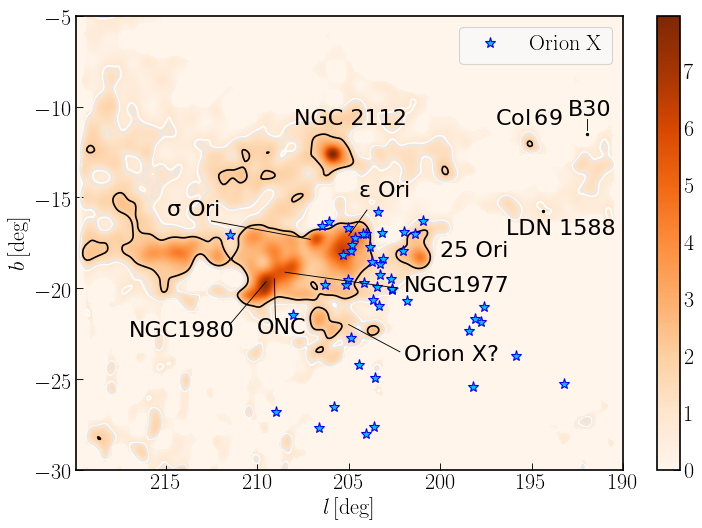

In [6]:
plt.figure(figsize=(10, 7))
xmin, xmax = 190., 220.
ymin, ymax = -30., -5.

im = plt.imshow(kde, cmap=plt.cm.Oranges,
          extent=[xmin, xmax, ymin, ymax], aspect = 'auto',
          origin = 'lower', interpolation = 'gaussian', vmin = 0.)
twosigma = plt.contour(kde, 
           cmap = plt.cm.gray_r,
           extent=[xmin, xmax, ymin, ymax],
            levels = [0.9, 1,2], lw = 2)

plt.plot(OrionX['GLON'], OrionX['GLAT'], '*', color = 'DeepSkyBlue', 
         ms = 10, markeredgecolor = 'b', label = 'Orion X')

#plt.plot(Monorion['GLON'], Monorion['GLAT'], '*', color = 'DarkGreen', 
#         ms = 10, markeredgecolor = 'g', label = 'Monorion')

plt.legend(loc = 1, numpoints = 1)
plt.colorbar(im)

rc('text', usetex= False)
plt.text(217., -22.7, 'NGC1980', fontsize = 20, family ='sans-serif')
plt.plot([211.5, 209.52], [-22., -19.65], 'k-', lw = 0.8)
#plt.text(216.5, -10.8, 'NGC1981', fontsize = 20, family ='sans-serif')
#plt.plot([212.8, 208.09], [-11.2, -18.8 ], 'k-', lw =0.8)
plt.text(200, -18.29, '25 Ori', fontsize = 20, family ='sans-serif')
plt.text(204.5, -15., '$\mathrm{\epsilon}$ Ori', fontsize = 20, family ='sans-serif')
plt.plot([204, 205.],[-15.7, -17.1], 'k-', lw = 0.8)
plt.text(215, -16., '$\mathrm{\sigma}$ Ori', fontsize = 20, family ='sans-serif')
plt.plot([212.5, 207.1], [-16.3, -17.31], 'k-', lw = 0.8)
plt.text(197., -11. , '$\mathrm{Col \, 69}$', fontsize = 20, family ='sans-serif')
plt.text(208, -11, 'NGC 2112', fontsize = 20, family ='sans-serif')
#plt.plot([205.9, 205.8],[-7.8, -12.61], 'k-', lw = 0.5)
plt.text(210.0, -22.5, 'ONC', fontsize = 20, family ='sans-serif')
plt.plot([209., 209.06], [-21.7, -19.48], 'k-', lw = 0.8)
plt.text(202, -20.2 , 'NGC1977', fontsize = 20, family ='sans-serif')
plt.plot([202.3, 208.47], [-20., -19.12], 'k-', lw = 0.8)

plt.text(193, -10.5 , 'B30', fontsize = 20, family ='sans-serif')
plt.plot([192., 192], [-10.7, -11.3], 'k-', lw = 0.8)
plt.plot(192., -11.5, 'ko', ms = 3, markeredgecolor = 'None', label ='$B30$')

plt.text(196.4, -17.06 , 'LDN 1588', fontsize = 20, family ='sans-serif')
plt.plot(194.4, -15.76, 'ko', ms = 3, markeredgecolor = 'None', label ='$B30$')

plt.text(202, -24. , 'Orion X?', fontsize = 20, family ='sans-serif')
plt.plot([202.2, 205], [-23.5, -22.], 'k-', lw = 0.8)


rc('text', usetex= True)
plt.xlabel(r'$l \, \mathrm{[deg]}$')
plt.ylabel(r'$b \, \mathrm{[deg]}$')
plt.axis([219.9, 190., -30., -5])
plt.tight_layout()

### 2. Check Distance

In [ ]:
#hdu = fits.open('/data1/Data/Zari+17/data')
#gaia = hdu[1].data
#tgas = gaia[~np.isnan(gaia['parallax'])]
#fits.writeto('/data1/Data/Zari+17/tgas.fits', tgas)

In [7]:
hdu = fits.open('/data1/Data/Zari+17/tgas+Hip.fits')
tgas = hdu[1].data

In [8]:
center = np.array([1., -0.5])
tgasProperMotionSelection = np.where((tgas['pmra'] - center[0])**2. + (tgas['pmdec']-center[1])**2 < 25.)
tgasProperMotion = tgas[tgasProperMotionSelection]
tgasPlx = tgasProperMotion[(tgasProperMotion['parallax'] >= 2.) & (tgasProperMotion['parallax'] <= 7.)]
#tgasPlx = tgasProperMotion[(tgasProperMotion['parallax'] >= 3.5) & (tgasProperMotion['parallax'] <= 7.)]

In [10]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra = tgasPlx['ra']*units.degree, dec = tgasPlx['dec']*units.degree)
gal = c.transform_to('galactic')

lTGAS, bTGAS = gal.l.value, gal.b.value
sourceidTGAS = tgasPlx['source_id']

KDE of the sources in tgas in the correct parallax-proper motion range

In [11]:
XTGAS = np.vstack([lTGAS,bTGAS]).T
xmin, xmax = 190.,220.
ymin, ymax = -30.,-5.

deg2rad = np.pi/180.
XTGAS = XTGAS*deg2rad

kde = KernelDensity(kernel='gaussian', bandwidth=0.4*deg2rad, metric = 'haversine').fit(XTGAS)

Xsamples = np.linspace(xmin, xmax, 300)
Ysamples = np.linspace(ymin, ymax, 250)
X,Y = np.meshgrid(Xsamples, Ysamples)
grid = np.vstack([X.ravel(), Y.ravel()]).T
grid = grid*deg2rad
log_dens_field_TGAS = kde.score_samples(grid).T


In [12]:
log_dens_field_TGAS = log_dens_field_TGAS.reshape(X.shape)

KDE of all the sources in TGAS

In [13]:
c = SkyCoord(ra = tgas['ra']*units.degree, dec = tgas['dec']*units.degree)
gal = c.transform_to('galactic')

lTGASAll, bTGASAll = gal.l.value, gal.b.value
sourceidTGAS = tgas['source_id']

In [14]:

XTGASAll = np.vstack([lTGASAll,bTGASAll]).T
xmin, xmax = 190.,220.
ymin, ymax = -30.,-5.

deg2rad = np.pi/180.
XTGASAll = XTGASAll*deg2rad

kde = KernelDensity(kernel='gaussian', bandwidth=0.4*deg2rad, metric ='haversine').fit(XTGASAll)

Xsamples = np.linspace(xmin, xmax, 300)
Ysamples = np.linspace(ymin, ymax, 250)
X,Y = np.meshgrid(Xsamples, Ysamples)
grid = np.vstack([X.ravel(), Y.ravel()]).T
grid = grid*deg2rad
log_dens_field_TGASAll = kde.score_samples(grid).T
log_dens_field_TGASAll = log_dens_field_TGASAll.reshape(X.shape)


In [15]:
tgas_density = np.exp(log_dens_field_TGAS)

In [16]:
mean_density_per_latitude = np.tile(np.exp(log_dens_field_TGASAll).mean(1), (Xsamples.size, 1)).T
stdv_density_per_latitude = np.tile(np.exp(log_dens_field_TGASAll).std(1), (Xsamples.size, 1)).T
normalized_density_tgas = (tgas_density - mean_density_per_latitude)/stdv_density_per_latitude 

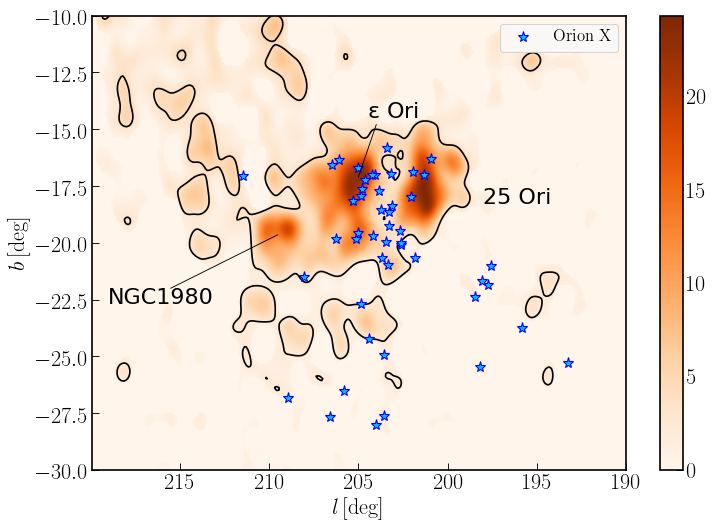

In [18]:
plt.figure(figsize=(10,7))
xmin, xmax = 190., 220.
ymin, ymax = -30., -5.

im = plt.imshow(np.exp(log_dens_field_TGAS)- mean_density_per_latitude, cmap=plt.cm.Oranges,
          extent=[xmin, xmax, ymin, ymax], aspect = 'auto',
          origin = 'lower', interpolation = 'gaussian', vmin = 0.)


threeSigma = plt.contour(normalized_density_tgas, 
            cmap = plt.cm.gray,
            extent=[xmin, xmax, ymin, ymax],
            levels = [3], lw = 1)

plt.plot(OrionX['GLON'], OrionX['GLAT'], '*', color = 'DeepSkyBlue', 
         ms = 10, markeredgecolor = 'b', label = 'Orion X')
#plt.plot(Monorion['GLON'], Monorion['GLAT'], '*', color = 'DarkGreen', 
#         ms = 10, markeredgecolor = 'g', label = 'Monorion')

rc('text', usetex= False)
plt.text(219., -22.7, 'NGC1980', fontsize = 20, family ='sans-serif')
plt.plot([215.5, 209.52], [-22., -19.65], 'k-', lw = 0.8)
plt.text(198, -18.29, '25 Ori', fontsize = 20, family ='sans-serif')
plt.text(204.5, -14.5, '$\mathrm{\epsilon}$ Ori', fontsize = 20, family ='sans-serif')
plt.plot([204, 205.],[-14.8, -17.1], 'k-', lw = 0.8)

rc('text', usetex= True)
plt.xlabel(r'$l \, \mathrm{[deg]}$', fontsize = 20)
plt.ylabel(r'$b \, \mathrm{[deg]}$', fontsize = 20)
plt.legend(fontsize = 15)
plt.colorbar(im)
plt.axis([219.9, 190., -30., -10])

plt.tight_layout()


In [19]:
XTGAS = XTGAS/deg2rad

inside_contour = np.full((lTGAS.size), False, dtype= bool)
for coll in threeSigma.collections:
    for p in coll.get_paths():
        inside_contour  = inside_contour | p.contains_points(XTGAS)

In [20]:
tgasIn = tgasPlx[inside_contour]

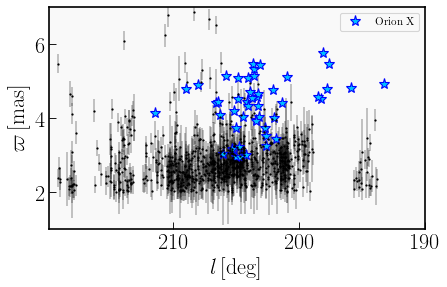

In [21]:
plt.errorbar(tgasIn['l'], tgasIn['parallax'], yerr = tgasIn['parallax_error'], fmt = 'ko', 
            elinewidth = 0.4, ms = 1)
plt.plot(OrionX['GLON'], OrionX['plx'], '*', color = 'DeepSkyBlue', 
         ms = 10, markeredgecolor = 'b', label = r'Orion X')
#plt.plot(Monorion['GLON'], Monorion['plx'], '*', color = 'DarkGreen', 
#         ms = 8, markeredgecolor = 'g', label = r'Monorion')


plt.xlim(219.9, 190)
plt.ylim(1., 7.)
plt.xlabel(r'$l\mathrm{ \, [deg]}$')
plt.ylabel(r'$\varpi \, \mathrm{[mas]}$')
plt.legend(fontsize = 10)
plt.tight_layout()


Here I am showing the density of the sources with $3 < \varpi < 7 \mathrm{mas}$.
So $\mathbf{there \,  is  \, clearly \,  something \,  in \,  the \,  foreground}$ of 25 Ori. But I am not sure how is it related to OrionX,
which looks even more on the foreground (see plot above, plx vs. GLON).

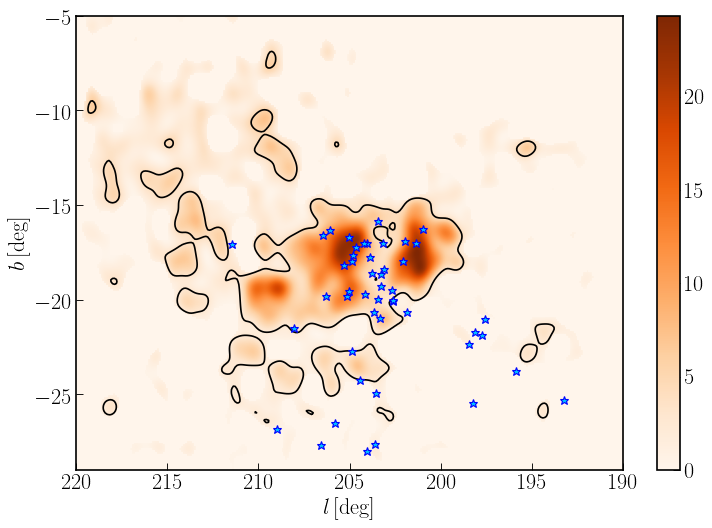

In [517]:
plt.figure(figsize = (10, 7))
im = plt.imshow(np.exp(log_dens_field_TGAS)- mean_density_per_latitude, cmap=plt.cm.Oranges,
          extent=[xmin, xmax, ymin, ymax], aspect = 'auto',
          origin = 'lower', interpolation = 'gaussian', vmin= 0)

threeSigma = plt.contour(normalized_density_tgas, 
            cmap = plt.cm.gray,
            extent=[xmin, xmax, ymin, ymax],
            levels = [3], lw = 1)

plt.plot(OrionX['GLON'], OrionX['GLAT'], '*', color = 'DeepSkyBlue', 
         ms = 8, markeredgecolor = 'b')


plt.xlabel(r'$l \, \mathrm{[deg]}$')
plt.ylabel(r'$b \, \mathrm{[deg]}$')
plt.colorbar(im)
plt.axis([220, 190, -29, -5])


plt.tight_layout()

In [346]:
XTGAS = XTGAS/deg2rad

inside_contour = np.full((tgasPlx['l'].size), False, dtype= bool)
for coll in threeSigma.collections:
    for p in coll.get_paths():
        inside_contour  = inside_contour | p.contains_points(XTGAS)

tgasIn = tgasPlx[inside_contour]

In [348]:
#fits.writeto('/data1/Data/TGAS/tgasHipForeground.fits', tgasIn, overwrite=True )

### 3. Age of the sources belonging to the over-densities

I will plot the color-magnitude diagrams of the sources belonging to

a) the over-densities (done in variance.ipynb)

b) the foreground from 3 to 7 mas


The 'only-hip' stars do not have G magnitude of course. 
So it is hard to complete TGAS bright end and use the same kind of analyisis.
The only thing that's doable now it's the study of the spatial distribution with Hipparcos and the age distribution without.


In [22]:
ahdu = fits.open('/data1/Data/Zari+17/tgas_inside_contour_2MASS.fits')
a = ahdu[1].data

bhdu = fits.open('/data1/Data/TGAS/tgasForeground_2MASS.fits')
b = bhdu[1].data

chdu = fits.open('/data1/Data/TGAS/tgasOrionX?_2MASS.fits')
c = chdu[1].data


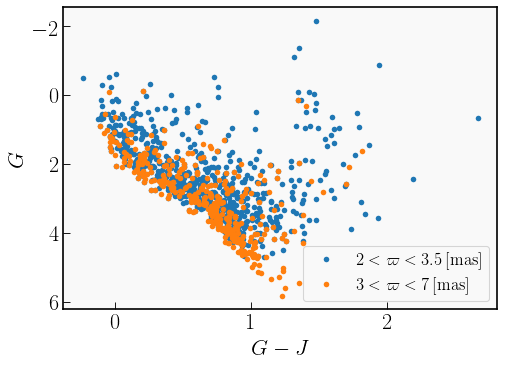

In [23]:
plt.figure(figsize=(7, 5))
plt.plot(a['phot_g_mean_mag_1']-a['j_m'], 
         a['phot_g_mean_mag_1'] - 5.*np.log10(100./a['parallax']),
        'o',  ms  =5, markeredgecolor = 'None', label =r'$2 < \varpi < 3.5 \, \mathrm{[mas]}$')

plt.plot(b['phot_g_mean_mag_1']-b['j_m'], 
         b['phot_g_mean_mag_1'] - 5*np.log10(100./b['parallax']),
        'o',  ms  =5, markeredgecolor = 'None', label = r'$3 < \varpi < 7 \, \mathrm{[mas]}$')

plt.gca().invert_yaxis()
plt.xlabel(r'$G-J$')
plt.ylabel(r'$G$')
plt.legend(fontsize = 15, loc = 4)



#### Isochrones

### Fit the foreground!

In [32]:
isoGaia  ='/home/ezari/PhD/Project1/IsoFit/padovaGaiaAv01Z002.fits'
iso2MASS = '/home/ezari/PhD/Project1/IsoFit/padovaJHKAv01Z002.fits'

In [25]:
flux_error = b['phot_g_mean_flux_error_1']
flux = b['phot_g_mean_flux_1']
Gmag = b['phot_g_mean_mag_1']
Jmag = b['j_m']

In [26]:
G0=25.525
sigmaG0 = 0.003
sigmaGmag = np.sqrt((1.0857*(flux_error/flux))**2. + sigmaG0**2.)
sigmaJ = b['j_msigcom']
sigmaGminj = np.sqrt(sigmaGmag**2. + sigmaJ**2.) 

In [27]:
plx = b['parallax']
sigmaPlx = b['parallax_error']
d = 1000./plx
mu = 5*np.log10(d) - 5
sigmamu = 5*sigmaPlx/plx

In [28]:
gAbsStar = Gmag - mu
gminjStar = Gmag - Jmag
sigmaGmagAbs = np.sqrt((sigmaGmag)**2 + (sigmamu)**2)

In [33]:
ages = np.arange(6., 8.5, 0.01)
d = 1000./np.mean(b['parallax'])
mu = 5*np.log10(d) - 5
gAbsStar = Gmag - mu

gfSmooth, gf = determineClusterAge(gAbsStar, gminjStar, sigmaGmagAbs, sigmaGminj,
                             iso2MASS, isoGaia, ages)

0 6.0 214
1 6.01 217
2 6.02 214
3 6.03 210
4 6.04 208
5 6.05 224
6 6.06 221
7 6.07 223
8 6.08 222
9 6.09 211
10 6.1 210
11 6.11 209
12 6.12 217
13 6.13 224
14 6.14 222
15 6.15 220
16 6.16 224
17 6.17 217
18 6.18 218
19 6.19 220
20 6.2 213
21 6.21 221
22 6.22 228
23 6.23 234
24 6.24 225
25 6.25 221
26 6.26 229
27 6.27 230
28 6.28 229
29 6.29 237
30 6.3 240
31 6.31 240
32 6.32 231
33 6.33 231
34 6.34 236
35 6.35 245
36 6.36 244
37 6.37 273
38 6.38 266
39 6.39 273
40 6.4 280
41 6.41 290
42 6.42 292
43 6.43 305
44 6.44 329
45 6.45 333
46 6.46 327
47 6.47 333
48 6.48 328
49 6.49 372
50 6.5 367
51 6.51 358
52 6.52 381
53 6.53 379
54 6.54 372
55 6.55 365
56 6.56 370
57 6.57 367
58 6.58 359
59 6.59 351
60 6.6 376
61 6.61 389
62 6.62 395
63 6.63 389
64 6.64 385
65 6.65 387
66 6.66 356
67 6.67 334
68 6.68 294
69 6.69 297
70 6.7 331
71 6.71 329
72 6.72 337
73 6.73 325
74 6.74 295
75 6.75 280
76 6.76 273
77 6.77 277
78 6.78 278
79 6.79 260
80 6.8 269
81 6.81 260
82 6.82 265
83 6.83 262
84 6.84 256

In [34]:
gfNorm = np.zeros((len(gAbsStar),len(ages)))

for i in range(len(gAbsStar)):
        try:
            
            gfNorm[i, :] = gf[i, :]/np.max(gf[i, :])
            
        except ValueError:
            print("Value Error at star:", i, "when computing gfNorm")
            pass

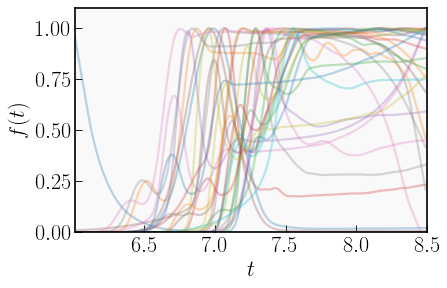

In [35]:
n = np.arange(0, len(gf), 12)

for i in range(len(n)):
    plt.plot(ages, gfSmooth[i, :]/max(gfSmooth[i, :]), '-', lw = 2, alpha = 0.3)
    
plt.axis([6.01, 8.5, 0., 1.1])
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.tight_layout()


In [37]:
indexesGood, indexesGood2, indexesBad, x1, x2 = computeGoodG(gfNorm, ages)
gfGood = gfNorm[indexesGood]
gfBad = gfNorm[indexesBad]
print(len(gfGood), len(gfBad))

345 14


In [38]:
singleAgesb = np.zeros(len(gfGood))
lonb = np.zeros((len(gfGood)))
latb = np.zeros((len(gfGood)))
sourceId = np.zeros((len(gfGood)))

for i in range(len(gfGood)):
    try:
        filtered = interp1d(ages, ((gfGood[i, :])), kind = 'cubic')
        xx = np.linspace(6., 8.39, len(ages))
        y = filtered(xx)
    
        singleAgesb[i] = ages[np.where(y == np.max(y))]
        lonb[i] = b['l_1'][i]
        latb[i] = b['b_1'][i]
        sourceId[i] = b['source_id_1'][i]
    except ValueError:
        print("Value Error at star:", i, "when computing singleAge")
        pass
        

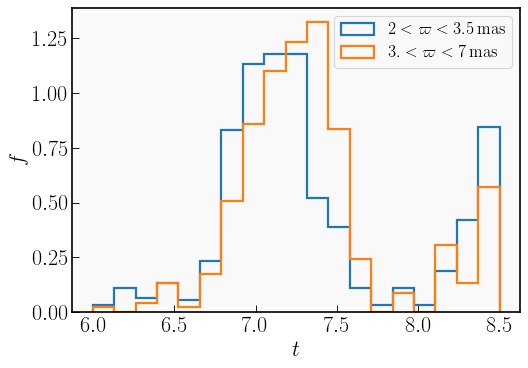

In [537]:
plt.figure(figsize=(7, 5))
plt.hist(singleAgesAll, bins = np.linspace(6., 8.5, 20), histtype='step',
         lw = 2,  normed = True, label = r'$2 < \varpi< 3.5 \, \mathrm{mas}$')
plt.hist(singleAgesb, bins = np.linspace(6., 8.5, 20), histtype='step', 
         lw = 2, normed = True, label = r'$3. < \varpi< 7 \, \mathrm{mas}$')
plt.xlabel(r'$t$')
plt.ylabel(r'$f$')
plt.legend(loc = 1, fontsize = 15)
plt.tight_layout()

### Functions

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess
def likelihood(gmag_obs, gmag_teor, sigma_g, gminj_obs, gminj_teor,  sigma_gminj):
    
    """
    Likelihood function for a single star:
    
    Parameters:
    -------------
    gmag_obs, gminj_obs - observed Gmag and GminJ; 
    gmag_teor, gminj - array with predicted Gmag and GminJ values; Note that 
                gmag_teor=gmag_teor(m)
    sigma_g, sigma_gminj -  error on Gmag and GminJ;
    
    Returns:
    ----------
    l - array with the likelihood function for one  star at fixed time and metallicity;
    
    """
    

  
    chisquared = np.zeros(len(gmag_teor))
    l = np.zeros(len(gmag_teor))
    for i in range(len(gmag_teor)):
        chisquared[i] = ((gmag_obs - gmag_teor[i])/sigma_g)**2. + \
                        ((gminj_obs - gminj_teor[i])/sigma_gminj)**2
        l[i] = (2.*np.pi*sigma_g*sigma_gminj)**(-1)*np.exp(-chisquared[i]/2.)
        
        
          
    return l


def massprior(m):
    """
    Prior on the underlying mass distribution.
    
    Parameters:
    ------------
    m - array with the isochrone initial masses (units M_{\odot}) 
    
    Returns:
    
    mp - prior (Kroupa IMF with a = -2.7 (this is true for M > 1 M_{\odot}))
    
    """
    
    A = 1.
    a = 2.7
    mp = A*m**(-a)
    
    return mp




def Gfunc(m, gmag_obs, gmag_teor, sigma_gmag, gminj_obs, gminj_teor, sigma_gminj):
    """
    Parameters:
    ------------
    m - array of the initial masses of the isochrone at a fixed time;
    Other parameters defined above.

    
    Returns:
    ------------
    G(t_j) as defined in equation 11 of Jorgensen and Lindegren (2005),
    without any dependency on the metallicity.
    """

    l = likelihood(gmag_obs, gmag_teor, sigma_gmag, gminj_obs, gminj_teor, sigma_gminj)
    G = np.zeros(len(m))
   
    for i in range(len(m)-2):
        mp = massprior(m[i+1])
        G[i] = l[i+1]*mp*(m[i+2]-m[i])
        
    return np.sum(G)
    


    
from scipy.signal import find_peaks_cwt
def computeGoodG(gfNormalized, age):
    """
    Parameters:
    -------------
    gfNormalized - array with the normalized G functions;
    age - isochrone ages
    
    Returns:
    -------------
    indexesGood, indexesBad - indexes of the "well-behaved" ("bad-behaved")
                              g-functions;
    
    
    """
    
    
    Glim = 0.6
    indexesGood, indexesGood2, indexesBad = [], [], []
    x1, x2 = [],[]
   
    for i in range(len(gfNormalized)):
        
        function = interp1d(age, gfNormalized[i, :])
        n = 1000
        x = np.linspace(min(age), max(age), n)
        y = function(x)
        
        
        w = np.where(function(x) > Glim)
        x = x[w]
        y = y[w]
        
        try:
            indx = np.argmax(y) 
            ### If the maximum is one of the two age limits, check 
            ### if there is another one:
            if (indx == len(y)-1) or (indx == 0):
                indexesBad.append(i)
                
            else:
                ii = indx


                while y[ii + 1] < y[ii]:
                    indxmin1 = ii
                    ii += 1
                    if ii == len(y)-1:
                        break


                iii = indx 
                while y[iii-1] < y[iii]:
                    indxmin2 = iii
                    iii = iii -1
                    if iii == 0:
                        break

                xmax = x[indxmin1]
                xmin = x[indxmin2]

                x1.append(xmax)
                x2.append(xmin)

                #eps = np.sqrt(xmax/xmin) - 1.
                eps = xmax - xmin
                if  (eps < 0.2):
                    indexesGood.append(i)
                elif (eps > 0.2):
                    indexesGood2.append(i)

                
                      

        except ValueError:
            indexesBad.append(i)
            print("Value Error at star:", i)
            pass
        
        
            
            
    return indexesGood, indexesGood2, indexesBad, x1, x2


def determineClusterAge(gStar, gminjStar, gStar_error, gminj_error, isochrone2MASS, isochroneGaia, age):
    
    """
    Parameters:
    gStar, gminjStar: array of the observed quantities (G magnitude and G-J color);
    isochrone2MASS, isochroneGaia: strings with the isochrone considered;
    age: array of the ages where the posterior distribution is evaluated;
    
    
    Returns:
    gfNorm: array of the normalized G functions, which can then be multiplied or
            singularly averaged to get the age estimate.
    
    """
    
    photo2MASS = fits.open(isochrone2MASS)
    photo2MASS = photo2MASS[1].data
    photoGaia = fits.open(isochroneGaia)
    photoGaia = photoGaia[1].data 
    
    gf = np.zeros((len(gStar), len(age)))
    
    for a in range(len(age)):
        w = np.where(np.round(photo2MASS['log(age/yr)'],3) == np.round(age[a],3))
        gTeor = photoGaia['G'][w]
        gminjTeor = photoGaia['G'][w]-photo2MASS['J'][w]
        mTeor = photoGaia['M_ini'][w]

        print(a, age[a], len(mTeor))
        for i in range(len(gStar)):
            gf[i, a] = Gfunc(mTeor, 
                         gStar[i], 
                         gTeor,
                         gStar_error[i],
                         gminjStar[i], 
                         gminjTeor,
                         gminj_error[i])
        
    gfSmoothed = np.zeros((len(gStar),len(age)))
                      
    for i in range(len(gStar)):
        try:
            filtered = lowess((abs(gf[i, :])), age, is_sorted=True, frac=0.1, it=0)
            gfSmoothed[i, :] = filtered[:, 1]
        except ValueError:
            print("Value Error at star:", i, "when computing gfSmoothed")
            pass
            
       
    return gfSmoothed, gf
